# Machine Learning with Python - Lab3

Polynomial Linear Regression

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [100]:
df = pd.read_csv('csv/FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [101]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<AxesSubplot: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

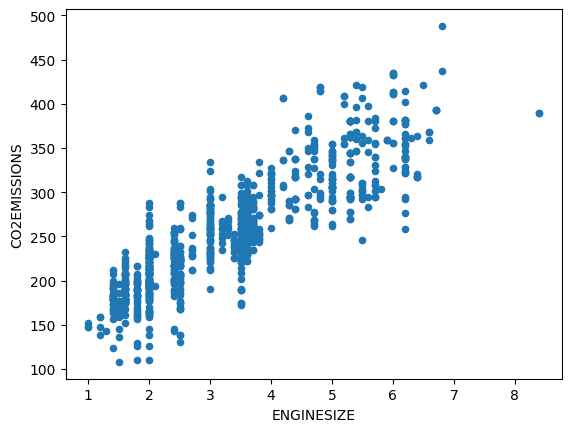

In [102]:
cdf.plot(kind='scatter',x='ENGINESIZE',y='CO2EMISSIONS')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df['ENGINESIZE'], df['CO2EMISSIONS'], test_size=0.2)

In [104]:
poly = PolynomialFeatures(degree=2)

#reshape the one-dimensional array X_train to have one column and unknown number of rows
train_x_poly = poly.fit_transform(np.array(X_train).reshape(-1, 1))

train_x_poly

array([[ 1.  ,  5.7 , 32.49],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  3.7 , 13.69],
       ...,
       [ 1.  ,  4.8 , 23.04],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  3.  ,  9.  ]])

In [105]:
clf = linear_model.LinearRegression()
_y_train = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.         50.58063662 -1.55066573]
Intercept:  107.39813724607473


<AxesSubplot: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

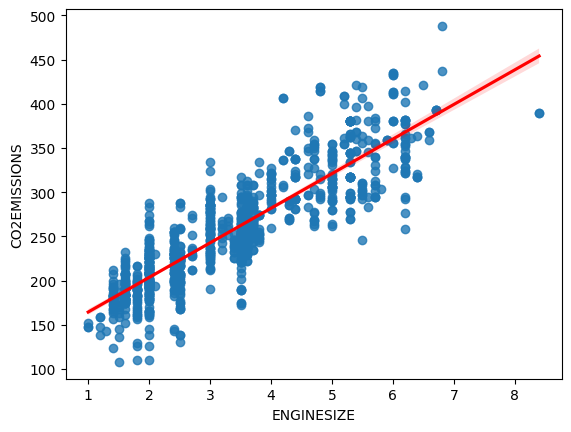

In [106]:
sns.regplot(data=df,x='ENGINESIZE',y='CO2EMISSIONS', line_kws={'color':'r'})

In [107]:
test_x_poly = poly.transform(np.array(X_test).reshape(-1, 1))
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )

Mean absolute error: 22.63
Residual sum of squares (MSE): 964.15
R2-score: 0.76


Polynomial regression with degree three (cubic)

Coefficients:  [ 0.         50.58063662 -1.55066573]
Intercept:  107.39813724607473
Mean absolute error: 22.63
Residual sum of squares (MSE): 964.15
R2-score: 0.76


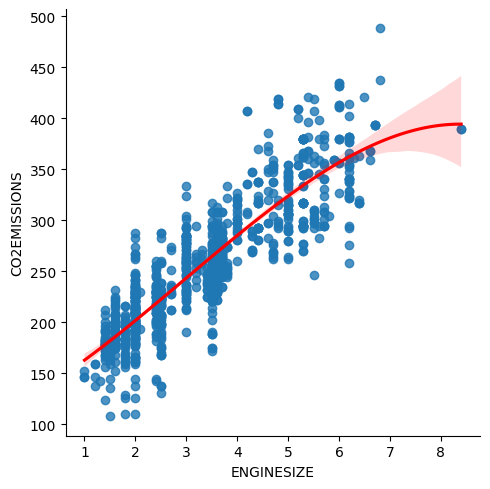

In [111]:
poly3 = PolynomialFeatures(degree=2)

train_x_poly3 = poly3.fit_transform(np.array(X_train).reshape(-1, 1))

clf = linear_model.LinearRegression()
_y_train = clf.fit(train_x_poly3, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

sns.lmplot(data=df,x='ENGINESIZE',y='CO2EMISSIONS', line_kws={'color':'r'}, order=3)

test_x_poly = poly.transform(np.array(X_test).reshape(-1, 1))
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )